Loading the Dataset
Let's start by loading the dataset and taking a look at the first few rows.

In [8]:
import pandas as pd
from IPython.display import display

ev_data = pd.read_csv(r'C:\Users\niko0523\Downloads\EV-data\Electric_Vehicle_Population_Data.csv')
print(display(ev_data.head()))

,V_UIN,State,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,5YJYGDEE1L,Maharashtra,Mumbai,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
1,7SAYGDEE9P,Telangana,Hyderabad,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC
2,5YJSA1E4XK,Maharashtra,Pune,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,5YJSA1E27G,Maharashtra,Thane,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4,5YJYGDEE5M,Delhi,Gurgaon,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC


None


Now Lets clean the data

In [9]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 15 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   V_UIN                                              177866 non-null  object 
 1   State                                              177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   Postal Code                                        177861 non-null  float64
 4   Model Year                                         177866 non-null  int64  
 5   Make                                               177866 non-null  object 
 6   Model                                              177866 non-null  object 
 7   Electric Vehicle Type                              177866 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  177866 non-null  object

In [11]:
ev_data.isnull().sum()

V_UIN                                                  0
State                                                  5
City                                                   5
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
dtype: int64

In [12]:
ev_data = ev_data.dropna()

Electric vehicle Acceptance over the time 

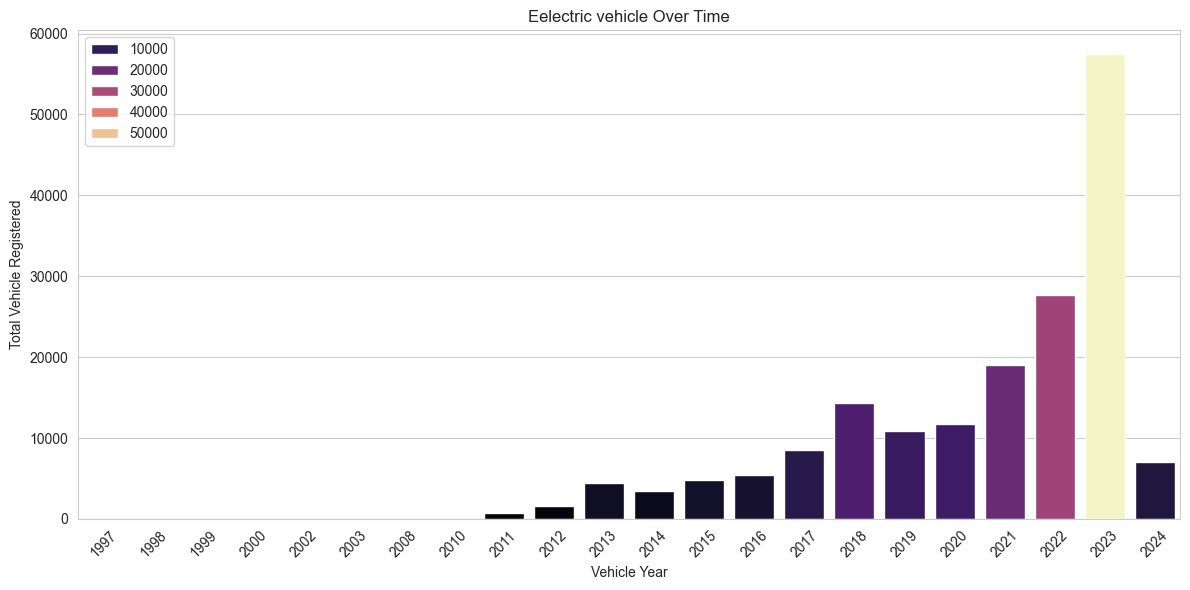

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')



plt.figure(figsize=(12,6))
ev_over_year = ev_data["Model Year"].value_counts().sort_index()
# x = ev_over_year.index
# y= ev_over_year.values

# norm = plt.Normalize(y.min(), y.max())
# cmap = plt.get_cmap("viridis")
sns.barplot(x=ev_over_year.index,y=ev_over_year.values,hue=ev_over_year.values,palette="magma")
plt.title("Eelectric vehicle Over Time")
plt.xlabel("Vehicle Year")
plt.ylabel("Total Vehicle Registered")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart clearly demonstrates that EV adoption has been increasing over time, with a notable upward trend beginning around 2016. Vehicle registrations grow modestly up to that point and then accelerate from 2017 onwards. In particular, the year 2023 shows a significant spike in registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs

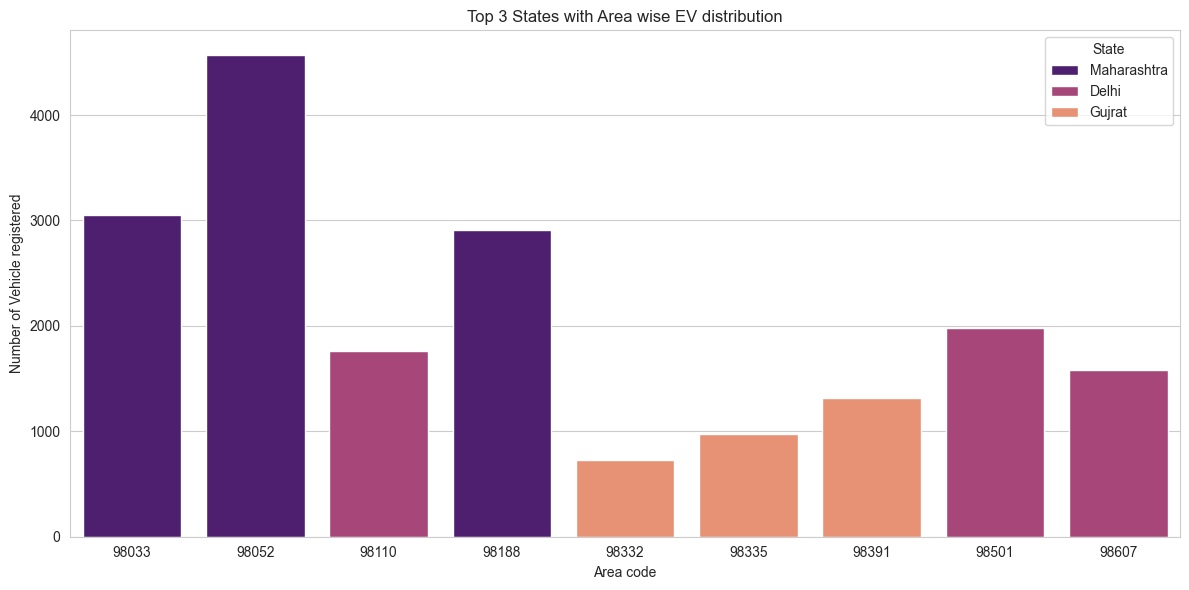

In [82]:
# lets find out geographical distribution at state level 
import numpy as np
ev_data_state =  ev_data["State"].value_counts()
top_states = ev_data_state.head(3) #top 3 states with EV distribution
top_states_list = top_states.index
postal_code_level = ev_data[ev_data["State"].isin(top_states_list)]
ev_postal_level =  postal_code_level.groupby(["State","Postal Code"]).size().reset_index(name='Number of Vehicles').sort_values(by=['State','Number of Vehicles'],ascending=[True,False]).groupby('State').head(3)
ev_postal_level["Postal Code"] = ev_postal_level["Postal Code"].apply(np.int64)
#lets plot the graph
plt.figure(figsize = (12,6))
sns.barplot(x='Postal Code',y='Number of Vehicles',hue='State',data=ev_postal_level ,palette='magma')
plt.title('Top 3 States with Area wise EV distribution')
plt.xlabel('Area code')
plt.ylabel('Number of Vehicle registered')
plt.legend(title='State')
plt.tight_layout()
plt.show()



The graph represents the distribution of electric vehicle (EV) registrations across different postal codes in three states: Maharashtra, Delhi, and Gujarat. Each state is indicated by a different color: purple for Maharashtra, pink for Delhi, and orange for Gujarat. The x-axis shows the area codes (postal codes), while the y-axis displays the number of registered EVs.

Key observations from the graph:

Maharashtra:

The postal code 98052 has the highest number of EV registrations, surpassing 4000 vehicles.
Other significant postal codes in Maharashtra include 98033 and 98188, each with a considerable number of registrations (over 3000 and 2000 respectively).
Delhi:

The postal code 98110 has the highest number of EV registrations in Delhi, with slightly over 2000 vehicles.
Another important postal code is 98501, with registrations close to 2000.
Gujarat:

The postal codes 98335 and 98391 have a moderate number of EV registrations, each with numbers ranging around 1000 to 1500 vehicles.
The postal code 98607 also shows a significant number of registrations, close to those in Delhi’s lower-ranking postal codes.
Summary
Maharashtra shows the highest overall number of EV registrations among the three states, especially in postal code 98052.
Delhi has a notable number of registrations, particularly in postal codes 98110 and 98501.
Gujarat shows moderate EV adoption, with its highest numbers in postal codes 98335, 98391, and 98607.
This graph highlights the areas within these states where EV adoption is most prevalent, providing insights into regional market penetration and potential areas for further infrastructure development.

Further we will analyse the distribution of electric vehicle types

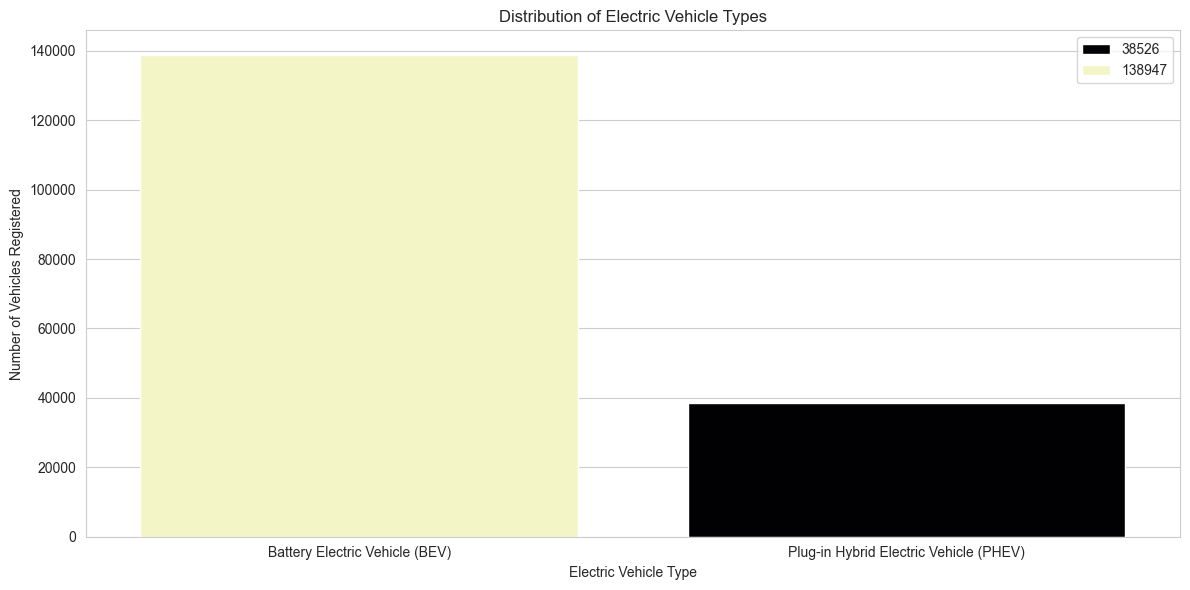

In [106]:
ev_type = ev_data["Electric Vehicle Type"].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=ev_type.index,y=ev_type.values,hue=ev_type.values ,palette="magma")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles Registered')
plt.tight_layout()
plt.show()


Summary:
The graph shows a clear preference for Battery Electric Vehicles (BEVs) over Plug-in Hybrid Electric Vehicles (PHEVs) among the registered electric vehicles. BEVs significantly outnumber PHEVs, with nearly four times more BEVs registered than PHEVs. This could suggest stronger market adoption and consumer preference for BEVs, possibly due to factors like greater range, fewer emissions, and advancements in battery technology.

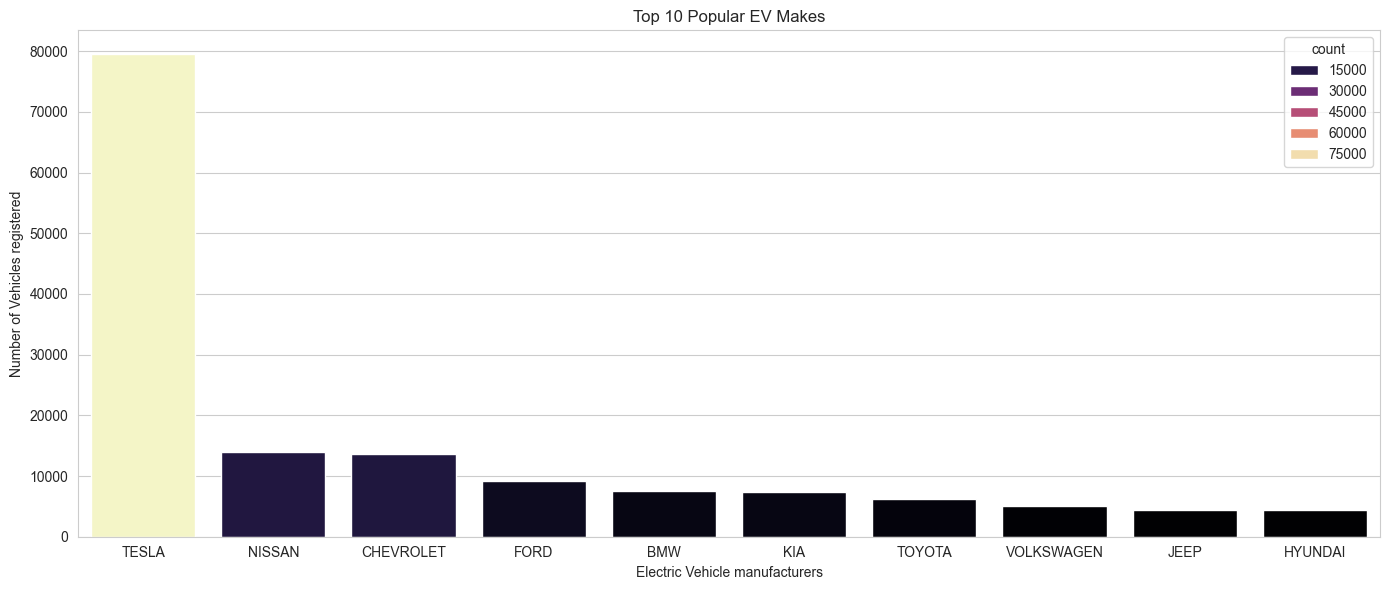

In [117]:
# manufacturers distribution analysis
ev_manufacturers = ev_data["Make"].value_counts().head(10)

plt.figure(figsize=(14, 6))
sns.barplot(x=ev_manufacturers.index ,y=ev_manufacturers.values,hue=ev_manufacturers ,palette="magma")
plt.title("Top 10 Popular EV Makes")
plt.xlabel("Electric Vehicle manufacturers")
plt.ylabel("Number of Vehicles registered")
plt.tight_layout()
plt.show()

Summary:
Tesla leads the EV market by a significant margin, with its registration numbers far exceeding those of other manufacturers.
Nissan and Chevrolet follow as distant second and third, respectively.
The remaining manufacturers have relatively similar registration numbers, indicating a competitive landscape among these brands but collectively making up a smaller share of the market compared to Tesla.
This graph underscores Tesla's strong market presence and suggests that while other manufacturers are competing, they have a much smaller share of the EV market.

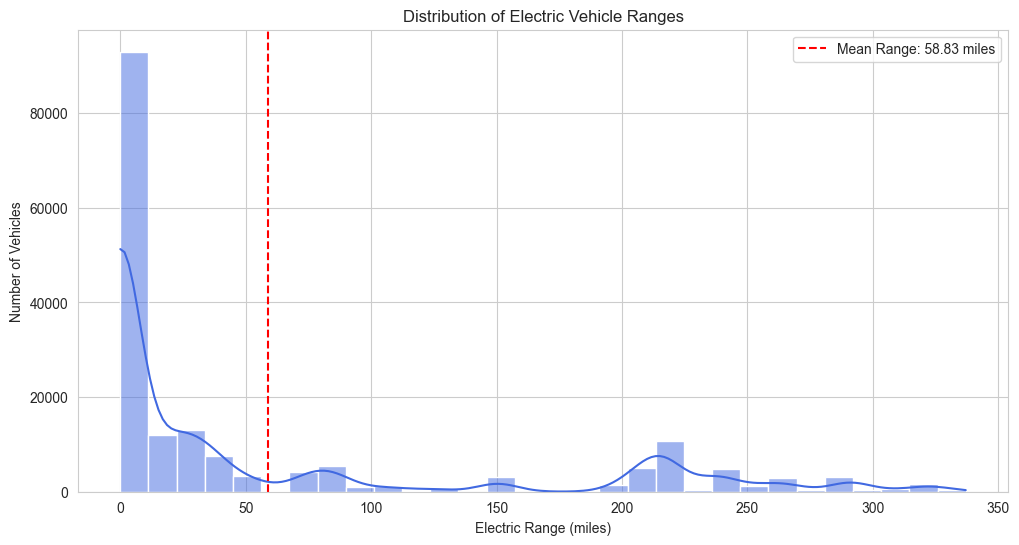

In [123]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

Summary:
High Frequency of Low-Range Vehicles: There is a notable concentration of vehicles with a low electric range. The graph shows a significant peak just before the 50-mile mark, indicating that many vehicles in this dataset have ranges close to or under this value.

Right-Skewed Distribution: The distribution of electric ranges is skewed to the right, which means there is a long tail extending towards higher electric ranges. This skewness suggests that while some vehicles have very high ranges, these are much less common compared to those with lower ranges.

Mean Electric Range: The mean electric range is approximately 58.84 miles. This mean is relatively low when considering the maximum ranges depicted in the graph. The mean is also likely influenced by the high frequency of vehicles with ranges below this value, reflecting the right-skewed nature of the distribution.

Majority Below Mean Range: Despite the presence of vehicles capable of achieving ranges up to around 350 miles, most vehicles have an electric range below the mean of 58.84 miles. This indicates that the data is heavily weighted towards lower-range vehicles, with fewer instances of vehicles with mid to high ranges.

In [124]:
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [126]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset exclusing current year 2024
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


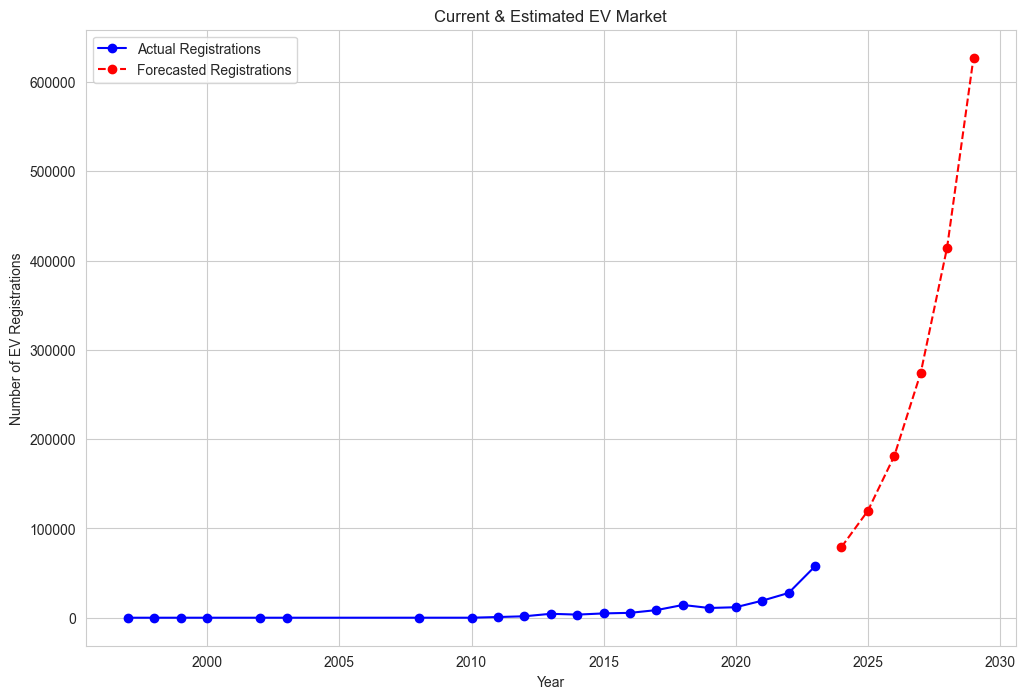

In [127]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

The graph provides a clear visual representation of the trends in electric vehicle (EV) registrations, leading to several key insights:

Stable Early Registrations: The number of EV registrations remained relatively low and stable until around 2010. This period likely reflects the early stage of EV market development, with limited consumer awareness and fewer available models.

Post-2010 Surge: Starting around 2010, there is a noticeable and consistent upward trend in actual EV registrations. This steep increase indicates a significant rise in EV adoption, likely driven by advancements in technology, increased availability of models, improved infrastructure, and greater environmental awareness among consumers.

Forecasted Growth: The forecasted data shows an even more dramatic increase in EV registrations in the near future. The projections suggest a sharp rise, indicating strong confidence in continued growth in EV adoption. Factors contributing to this forecast could include further advancements in battery technology, government incentives, stricter emissions regulations, and increased consumer demand for sustainable transportation options.

Expanding Market Size: Given the growing trend in actual EV registrations and the projected acceleration, the EV market size is expected to expand considerably. The steep increase in forecasted registrations suggests that consumer adoption of EVs is on the rise and that this trend is likely to continue. This points towards a significant shift in consumer preferences toward electric vehicles.

Promising Industry Future: Overall, the data indicate a promising future for the EV industry. The significant shift in consumer preferences towards EVs, combined with the expected rise in registrations, suggests potential increases in related investments and business opportunities. Companies involved in the EV supply chain, from manufacturers to charging infrastructure providers, stand to benefit from this expanding market.

In summary, the graph highlights a robust and accelerating growth trend in EV registrations, signaling a transformative period for the automotive industry and a substantial move towards sustainable transportation.